### Birliktelik Kuralları 

Birliktelik kuralı, geçmiş verilerin analiz edilerek bu veriler içindeki birliktelik davranışlarının tespiti ile geleceğe yönelik çalışmalar yapılmasını destekleyen bir yaklaşımdır. 
Birliktelik kurallarının kullanıldığı en tipik örnek Market Sepeti Analizi’dir (Pazar Sepeti Analizi).

### Market Sepet Analizi 
Bir müşteri süt satın alıyorsa, aynı alışverişte sütün yanında ekmek alma olasılığı nedir? Bu tip bir bilgi ışığında rafları düzenleyen market yöneticileri ürünlerindeki satış oranını arttırabilirler. 
Örneğin bir marketin müşterilerinin süt ile birlikte ekmek satın alma oranı yüksekse, market yöneticileri süt ile ekmek raflarını yan yana koyarak ekmek satışlarını arttırabilirler. 
Örneğin; bir A ürününü satın alan müşteriler aynı zamanda B ürününü da satın alıyorlarsa, bu durum Birliktelik Kuralı ile gösterilir.

### Apriori Algoritması 
Apriori algoritması, Agrawal ve Srikant tarafından 1994 yılında geliştirilmiştir.
Veri Madenciliğinde, birliktelik kuralı çıkarım algoritmaları içerisinde en fazla bilinen ve kullanılan algoritmadır. 

In [95]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

In [96]:
hamveri = pd.read_csv("retail_dataset.csv",sep=",")

In [97]:
hamveri.shape

(315, 7)

In [98]:
hamveri.head()

,0,1,2,3,4,5,6
0,Ekmek,Kola,Yumurta,Kiyma,Peynir,Kalem,Bebek Bezi
1,Ekmek,Peynir,Kiyma,Bebek Bezi,Kola,Sut,Kalem
2,Peynir,Kiyma,Yumurta,Sut,Kola,NaN,NaN
3,Peynir,Kiyma,Yumurta,Sut,Kola,NaN,NaN
4,Kiyma,Kalem,Kola,NaN,NaN,NaN,NaN


In [99]:
column_names = (hamveri['0'].unique())
column_names

array(['Ekmek', 'Peynir', 'Kiyma', 'Yumurta', 'Kola', 'Makarna', 'Kalem',
       'Bebek Bezi', 'Sut'], dtype=object)

In [100]:
hamveri.isna().sum()

0      0
1     30
2     70
3    128
4    182
5    244
6    274
dtype: int64

In [101]:
hamveri["0"].unique()

array(['Ekmek', 'Peynir', 'Kiyma', 'Yumurta', 'Kola', 'Makarna', 'Kalem',
       'Bebek Bezi', 'Sut'], dtype=object)

In [102]:
encoded_vals = []
for index, row in hamveri.iterrows(): 
    labels = {}
    uncommons = list(set(column_names) - set(row))
    commons = list(set(column_names).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

In [103]:
ohe_hamveri = pd.DataFrame(encoded_vals)

In [104]:
ohe_hamveri

,Makarna,Sut,Kiyma,Peynir,Bebek Bezi,Kola,Yumurta,Kalem,Ekmek
0,0,0,1,1,1,1,1,1,1
1,0,1,1,1,1,1,0,1,1
2,0,1,1,1,0,1,1,0,0
3,0,1,1,1,0,1,1,0,0
4,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
310,0,0,0,1,0,0,1,0,1
311,0,1,1,0,0,0,0,1,0
312,0,0,1,1,1,1,1,1,1
313,0,0,1,1,0,0,0,0,0


In [105]:
# Müşterilerin makarna ürününü kaç kere satın aldığı
ohe_hamveri["Makarna"][ohe_hamveri["Makarna"]>0].sum()

134

In [106]:
miktar = ohe_hamveri[column_names][ohe_hamveri[column_names]>0].sum()

In [107]:
miktar = pd.DataFrame(miktar,dtype=int)
miktar.columns=["Miktar"]
miktar

,Miktar
Ekmek,159
Peynir,158
Kiyma,150
Yumurta,138
Kola,138
Makarna,134
Kalem,114
Bebek Bezi,128
Sut,158


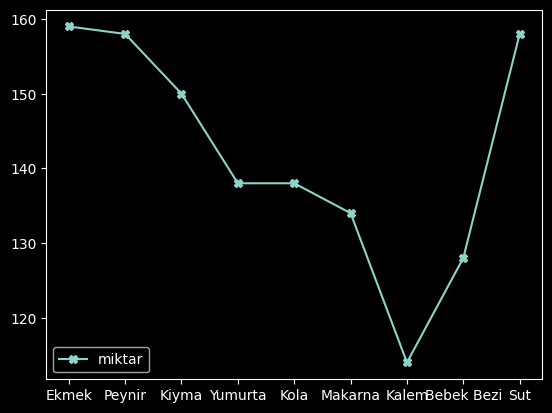

In [108]:
plt.style.use('dark_background')
plt.plot(miktar, label = 'miktar',marker = 'X')
plt.legend()

Birinci Adım
Apriori algoritmasının ilk adımı, elimizde bulunan verilerdeki her ürünün frekans değerinin (tekrar sayısının) bulunup, support değerlerinin hesaplanmasıdır. Her ürünün tablomuzda kaç kez bulunduğunu tek tek saydığımızda oluşan frekans ve support tablosu aşağıda gösterilmiştir.

In [109]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


Birliktelik kuralında, öğeler arasındaki birliktelik, destek ve güven kriterleri ile hesaplanır.
Destek (Support) kriteri, veride öğeler arasındaki bağıntının ne kadar sık olduğunu belirtir.
X ve Y farklı ürünler olmak üzere, X ürünü için destek, tüm alışverişler içinde X ürününün oranıdır.
DESTEK(X) = X Sayısı / Toplam Alışveriş Sayısı X ve Y ürünleri için destek,
X ve Y’nin bir arada tüm alışverişler içinde bulunma olasılığıdır.
DESTEK(X, Y) = (X, Y) Sayısı / Toplam Alışveriş Sayısı

In [110]:
# Öncelikle minimum destek değerini belirliyoruz.


from mlxtend.frequent_patterns import apriori, association_rules
frekans_degeri = apriori(ohe_hamveri, min_support = 0.2, use_colnames = True, verbose = 1)

Processing 4 combinations | Sampling itemset size 4 3


C:\Users\gulse\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [111]:
frekans_degeri
# Belirlediğimiz destek değerinin üstündeki tüm ürünler ve ürün kombinasyonları bulundu.

,support,itemsets
0,0.425397,(Makarna)
1,0.501587,(Sut)
2,0.476190,(Kiyma)
3,0.501587,(Peynir)
4,0.406349,(Bebek Bezi)
5,0.438095,(Kola)
6,0.438095,(Yumurta)
7,0.361905,(Kalem)
8,0.504762,(Ekmek)
9,0.225397,"(Makarna, Sut)"


In [112]:
# Destek değeri 0.45'ten yüksek olanları göster.
frekans_degeri["itemsets"][frekans_degeri["support"]>0.45]

1       (Sut)
2     (Kiyma)
3    (Peynir)
8     (Ekmek)
Name: itemsets, dtype: object

<Axes: >

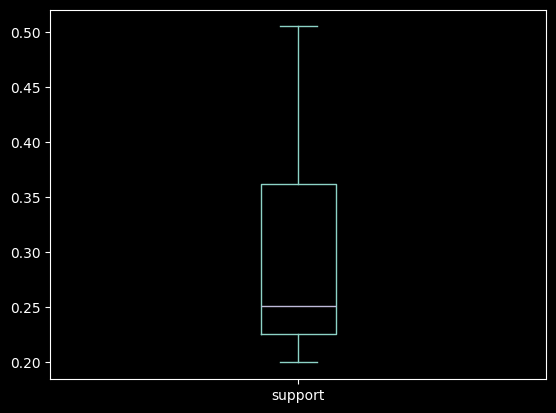

In [113]:
# Tek veya birlikte ürün kombinasyonları ortalama 0.25 destek değerine sahip.
frekans_degeri["support"].plot.box()

Güven (confidence) kriteri ise Y ürününün hangi olasılıkla X ürünü ile beraber olacağını söyler.
GÜVEN(X, Y) = (X, Y) Sayısı / X’i İçeren Alışveriş Sayısı GÜVEN(X ⇒ Y) = DESTEK(X, Y) / DESTEK(X)
Elde edilen kuralların güvenirliliği, destek ve güven değerleri ile doğru orantılıdır. 
Her kural bir destek ve güven değeri ile ifade edilir.
A⇒B      [destek = 2%, güven = 60%] Birliktelik kuralı için 2% destek değeri,
analiz edilen tüm alışverişlerden 2%’sinde A ile B ürünlerinin birlikte satıldığını belirtir.
60% oranındaki güven değeri ise A ürününü satın alan müşterilerin 60%’ ının aynı alışverişte B ürününü de satın aldığını gösterir. 

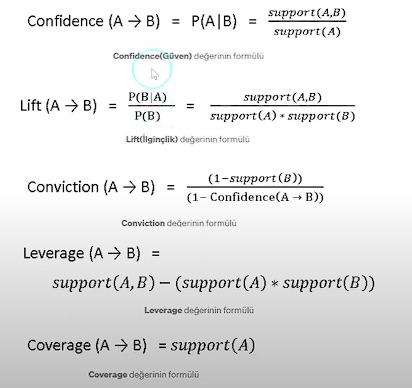

In [136]:
Image(filename='hey.png',width=600, height=400)

Bulacağımız değerler aşağıda sıralanmıştır.
1. Confidence (Güven)
2. Lift (İlginçlik)
3. Conviction
4. Leverage
5. Conviction

Bu değerler arasından genellikle kullanacağımız iki değer vardır.
Confidence (Güven) ve Lift (İlginçlik).
Confidence değeri 0 ile 1 arasındadır. Yüksek değer kuralımızın güvenli(doğru olabilecek) olduğunu belirtir.

In [71]:
solve = association_rules(frekans_degeri, metric = "confidence", min_threshold = 0.6)

In [72]:
solve

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Makarna),(Ekmek),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650,0.402687
1,(Sut),(Peynir),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
2,(Peynir),(Sut),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
3,(Kiyma),(Peynir),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540,0.500891
4,(Peynir),(Kiyma),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891,0.526414
5,(Yumurta),(Kiyma),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624,0.387409
6,(Kola),(Peynir),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754,0.330409
7,(Yumurta),(Peynir),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203,0.469167
8,"(Sut, Kiyma)",(Peynir),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137,0.524816
9,"(Sut, Peynir)",(Kiyma),0.304762,0.476190,0.203175,0.666667,1.400000,0.058050,1.571429,0.410959


<Axes: >

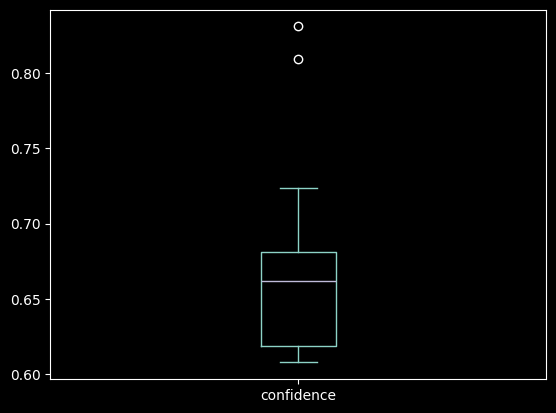

In [73]:
solve["confidence"].plot.box()

In [74]:
solve[solve["confidence"]>0.8]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,"(Sut, Kiyma)",(Peynir),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137,0.524816
11,"(Yumurta, Kiyma)",(Peynir),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667,0.518717


In [75]:
solve[(solve["confidence"]>0.6) & (solve["support"]>0.3)]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Sut),(Peynir),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
2,(Peynir),(Sut),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
3,(Kiyma),(Peynir),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540,0.500891
4,(Peynir),(Kiyma),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891,0.526414
